In [2]:
#%%
import os
from random import uniform
from bayes_opt import BayesianOptimization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from xgboost import XGBRegressor
import GPyOpt
from GPyOpt.methods import BayesianOptimization


In [3]:
#%%
# Metrics Cals
errors = pd.DataFrame(index=['LinearRegression', 'RandomForestRegressor', 'XGBRegressor'], 
             columns=['Model score','Mean Absolute Percentage Error (MAPE)','Mean Absolute Error (MAE)',' Mean Squared Error (MSE)',
                      'Root Mean Squared Error (RMSE)', 'Explained Variance Score', 'Max Error', 'Median Absolute Error','R^2'])

def CalculateMetrics(index, modelScore, y_test, y_pred):
    errors.loc[errors.index[index]] = [modelScore, (metrics.mean_absolute_error(y_test, y_pred))/(sum(np.array(y_test))/len(y_test)),
                                       metrics.mean_absolute_error(y_test, y_pred),metrics.mean_squared_error(y_test, y_pred),
                                       metrics.mean_squared_error(y_test, y_pred, squared=False), metrics.explained_variance_score(y_test, y_pred),
                                       metrics.max_error(y_test, y_pred),metrics.median_absolute_error(y_test, y_pred),metrics.r2_score(y_test, y_pred)] 



In [5]:
#%%

data = pd.read_csv(os.getcwd() + f'\\data\\modeling_data.csv')
data.head(10)

,time,time_sec,signal,pred_signal_linreg,residuals,FT_1,FT_2,FT_3,FT_4,FT_5,FT_6,FT_All,weekDate
0,2024-05-01 00:00:00,0.0,7,70.854323,-63.854323,-14864.434090,-1817.973185,-2226.942469,-2137.304418,-221.680414,278.433789,-20989.900787,2
1,2024-05-01 01:00:00,3600.0,4,70.844498,-66.844498,-17999.078303,-4184.918959,-2307.496988,-2308.628185,-1140.081878,1658.677472,-26281.526841,2
2,2024-05-01 02:00:00,7200.0,3,70.834673,-67.834673,-19907.115074,-5430.519078,-2383.937826,942.270534,-1790.378038,-1137.028428,-29706.707911,2
3,2024-05-01 03:00:00,10800.0,2,70.824847,-68.824847,-20458.514851,-5221.015995,-2456.128711,2796.383304,-2019.643167,-1070.108248,-28429.027667,2
4,2024-05-01 04:00:00,14400.0,3,70.815022,-67.815022,-19615.700651,-3612.545892,-2523.940942,505.243979,-1773.962543,1690.957218,-25329.948832,2
5,2024-05-01 05:00:00,18000.0,3,70.805197,-67.805197,-17436.108867,-1036.097035,-2587.253630,-2534.849775,-1111.111209,194.804383,-24510.616135,2
6,2024-05-01 06:00:00,21600.0,24,70.795372,-46.795372,-14068.275079,1817.973185,-2645.953903,-1817.378776,-186.967406,-1791.795387,-18692.397366,2
7,2024-05-01 07:00:00,25200.0,73,70.785547,2.214453,-9741.711593,4184.918959,-2699.937114,1594.105297,781.144251,732.697159,-5148.783041,2
8,2024-05-01 08:00:00,28800.0,111,70.775722,40.224278,-4751.266561,5430.519078,-2749.107023,2642.548398,1565.559525,1412.523429,3550.776844,2
9,2024-05-01 09:00:00,32400.0,84,70.765897,13.234103,562.969435,5221.015995,-2793.375975,-226.221591,1981.812809,-1463.873089,3282.327585,2


In [6]:
# %%

#X, y = data[['time_sec','FT_1', 'FT_2', 'FT_3', 'FT_4']], data['signal']

X = pd.DataFrame(data[['time_sec','FT_1', 'FT_2', 'FT_3', 'FT_4', 'weekDate']]) 
y = pd.DataFrame(data['signal']) 

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=42)


In [7]:
# %%
# Using Linear Regression

lr_reg= LinearRegression()
lr_reg.fit(X_train, y_train)

y_pred = lr_reg.predict(X_test)


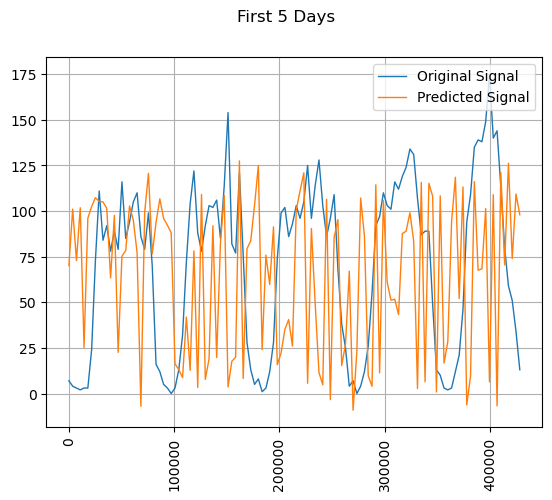

In [8]:
#%%
# Original Signal VS Predicted Signal
N = 24 * 5

plt.plot(X['time_sec'][:N], y[:N], linewidth=1, label='Original Signal')
plt.plot(X['time_sec'][:N], y_pred[:N], linewidth=1, label='Predicted Signal')
plt.legend(loc='upper right')
plt.suptitle('First 5 Days')
plt.grid()
plt.xticks(rotation=90)

print()

In [9]:
# %%
# Calculate metrics
CalculateMetrics(0, lr_reg.score(X,y), y_test, y_pred)



In [10]:
#%%
# Using RandomForestRegressor
regr = RandomForestRegressor(max_features='sqrt',min_samples_leaf=4,min_samples_split=3,n_estimators=40, n_jobs=-1)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

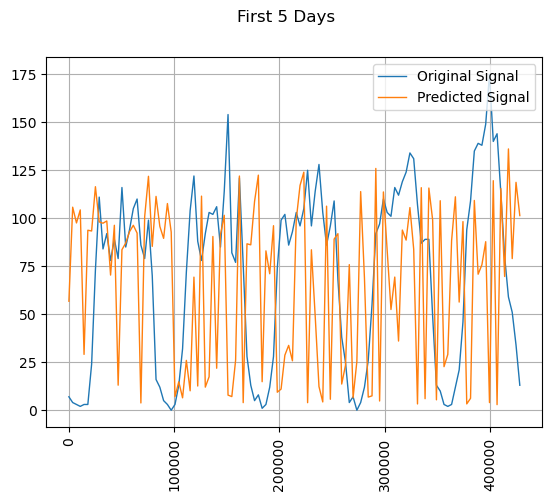

In [11]:
#%%
# Original Signal VS Predicted Signal
N = 24 * 5

plt.plot(X['time_sec'][:N], y[:N], linewidth=1, label='Original Signal')
plt.plot(X['time_sec'][:N], y_pred[:N], linewidth=1, label='Predicted Signal')
plt.legend(loc='upper right')
plt.suptitle('First 5 Days')
plt.grid()
plt.xticks(rotation=90)

print()

In [12]:
#%%
# Calculate metrics
CalculateMetrics(1, regr.score(X,y), y_test, y_pred)


In [13]:
# %%
# Using XGBRegressor

In [17]:
#%%
# Hyperparameter tuning with random search


# Instantiate an XGBRegressor with default hyperparameter settings
xgb = XGBRegressor()

# and compute a baseline to beat with hyperparameter optimization 
baseline = cross_val_score(xgb, X_train, y_train, scoring='neg_mean_squared_error').mean()

# Hyperparameters to tune and their ranges

params = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1], 
             # 'max_depth': [7,10,15,20],
             # 'min_child_weight': [10,15,20,25],
             # 'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [200,250,300,350],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
             # "gamma"       : [1,2,3]
             }

rs = RandomizedSearchCV(xgb, param_distributions=params, 
                        scoring='neg_mean_squared_error', n_iter=25)

# Run random search for 25 iterations
rs.fit(X_train, y_train);


In [18]:
#%%
# Hyperparameter tuning Bayesian optimization
bds = [{'name': 'learning_rate', 'type': 'continuous', 'domain': (0, 1)},
        {'name': 'gamma', 'type': 'continuous', 'domain': (0, 5)},
        {'name': 'max_depth', 'type': 'discrete', 'domain': (1, 50)},
        {'name': 'n_estimators', 'type': 'discrete', 'domain': (1, 300)},
        {'name': 'min_child_weight', 'type': 'discrete', 'domain': (1, 10)}]

# Optimization objective 
def cv_score(parameters):
    parameters = parameters[0]
    score = cross_val_score(
                XGBRegressor(learning_rate=parameters[0],
                              gamma=int(parameters[1]),
                              max_depth=int(parameters[2]),
                              n_estimators=int(parameters[3]),
                              min_child_weight = parameters[4]), 
                X_train, y_train, scoring='neg_mean_squared_error').mean()
    score = np.array(score)
    return score

optimizer = BayesianOptimization(f =cv_score,
                                 domain = bds,
                                 model_type='GP',
                                 acquisition_type ='EI',
                                 acquisition_jitter = 0.05,
                                 exact_feval=True, 
                                 maximize=True,
                                 #acquisition_weight = 2,
                                 normalize_Y= False)

# Only 25 iterations because we have 5 initial random points
optimizer.run_optimization(max_iter=25)



Baseline neg. MSE = -288.66
Random search neg. MSE = -283.42
Bayesian optimization neg. MSE = -368.32


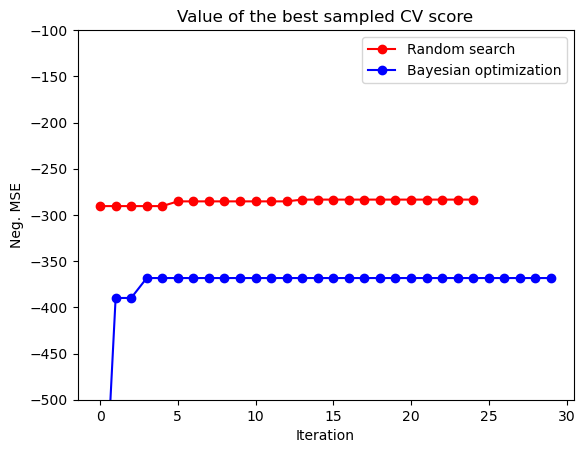

In [19]:
#%%
# Plot Hyperparameter tuning Results
y_rs = np.maximum.accumulate(rs.cv_results_['mean_test_score'])
y_bo = np.maximum.accumulate(-optimizer.Y).ravel()

print(f'Baseline neg. MSE = {baseline:.2f}')
print(f'Random search neg. MSE = {y_rs[-1]:.2f}')
print(f'Bayesian optimization neg. MSE = {y_bo[-1]:.2f}')

plt.plot(y_rs, 'ro-', label='Random search')
plt.plot(y_bo, 'bo-', label='Bayesian optimization')
plt.xlabel('Iteration')
plt.ylabel('Neg. MSE')
plt.ylim(-500, -100)
plt.title('Value of the best sampled CV score');
plt.legend();

In [20]:
# %%

# WE SELECT RANDOM

xgb = XGBRegressor(**rs.best_params_)
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

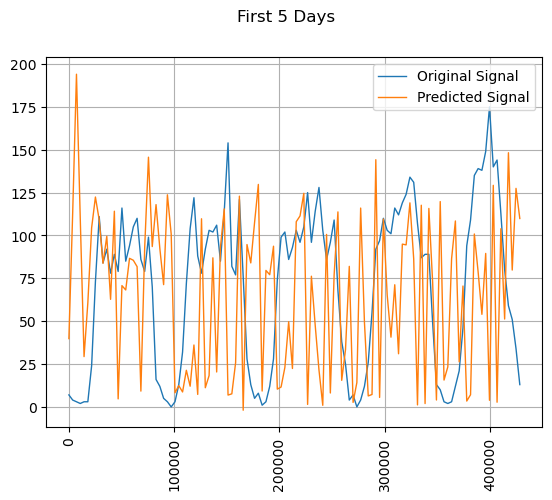

In [21]:
#%%
N = 24 * 5

plt.plot(X['time_sec'][:N], y[:N], linewidth=1, label='Original Signal')
plt.plot(X['time_sec'][:N], y_pred[:N], linewidth=1, label='Predicted Signal')
plt.legend(loc='upper right')
plt.suptitle('First 5 Days')
plt.grid()
plt.xticks(rotation=90)

print()


In [22]:
#%%
# Calculate metrics
CalculateMetrics(2, xgb.score(X,y), y_test, y_pred)



In [23]:
#%%
# PRINT METRICS

errors

# CONCLUSION
# XGBRegressor BY FAR BETTER
# BECAUSE WE HAVE TIME SERIES REGRESSION, WE SELECT Mean Absolute Percentage Error (MAPE)





,Model score,Mean Absolute Percentage Error (MAPE),Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Explained Variance Score,Max Error,Median Absolute Error,R^2
LinearRegression,0.806813,[0.2148282688930466],14.740188,385.829971,19.642555,0.811011,90.109921,11.198099,0.810956
RandomForestRegressor,0.895458,[0.1648851689525687],11.313401,259.513702,16.109429,0.873206,65.451481,7.247502,0.872847
XGBRegressor,0.964196,[0.15528796602887376],10.654901,213.392057,14.607945,0.895471,58.05883,7.847694,0.895445


In [ ]:
# %%
